In [10]:
from argon2 import PasswordHasher
from datetime import datetime
import random
import string

def get_random_string(length):
    letters = string.ascii_lowercase
    return ''.join(random.choice(letters) for i in range(length))

def get_random_length():
    return random.randrange(5, 10000)


ph = PasswordHasher()
file = open("hash_data.csv", "w")
file.truncate()
file.write("microseconds,hash length,iterations")
file.write("\n")
for i in range(100):
    string_length = get_random_length()
    string_to_hash = get_random_string(string_length)
    start = datetime.now()
    hash = ph.hash(string_to_hash)
    end = datetime.now()
    diff = end - start
    diff = diff.microseconds
    file.write(str(diff))
    file.write(",")
    file.write(str(string_length))
    file.write(",")
    file.write(str(i + 1))
    file.write("\n")
file.close()


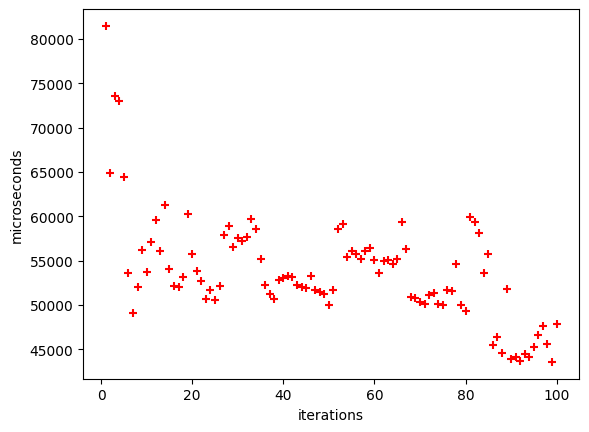

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

df = pd.read_csv("hash_data.csv")
plt.xlabel('iterations')
plt.ylabel('microseconds')
plt.scatter(df[['iterations']], df.microseconds, color="red", marker="+")

In [34]:
iter_reg = linear_model.LinearRegression()
iter_reg.fit(df[['iterations']], df.microseconds)
iter_reg.predict([[600]])

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-14131.3360036])

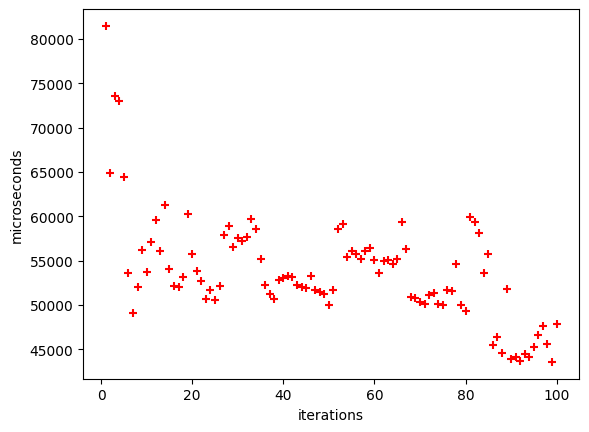

In [23]:
plt.xlabel('iterations')
plt.ylabel('microseconds')
plt.scatter(df[['iterations']], df.microseconds, color="red", marker="+")

In [30]:
hash_length_reg = linear_model.LinearRegression()
hash_length_reg.fit(df[['hash length']], df.microseconds)
hash_length_reg.predict([[10000]])

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53194.72396693])